In [296]:
import csv
import pandas as pd
filename = "t-shirts.csv"

data = pd.read_csv(filename)
df = pd.DataFrame(data)

print(df.describe(include='all'))

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965


Explore the size feature

In [297]:
import matplotlib.pyplot as plt

def plot_features_count(df, feature):
    feature_counts = df[feature].value_counts()

    plt.figure(figsize=(10, 4))
    feature_counts.plot(kind='bar')
    plt.title('Count of each ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    for index, value in enumerate(feature_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')
    plt.show()

Plot columns distinct values count

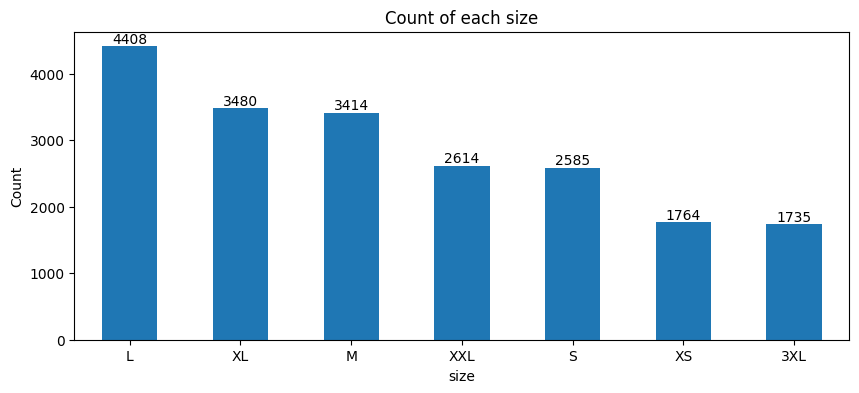

In [298]:
plot_features_count(df, 'size')

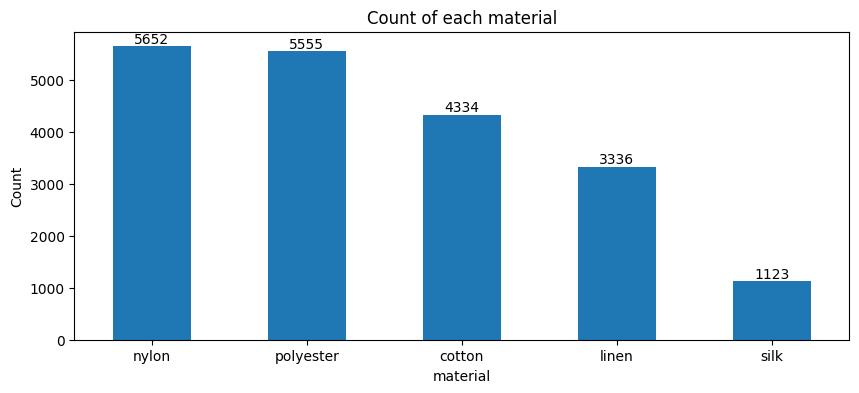

In [299]:
plot_features_count(df, 'material')

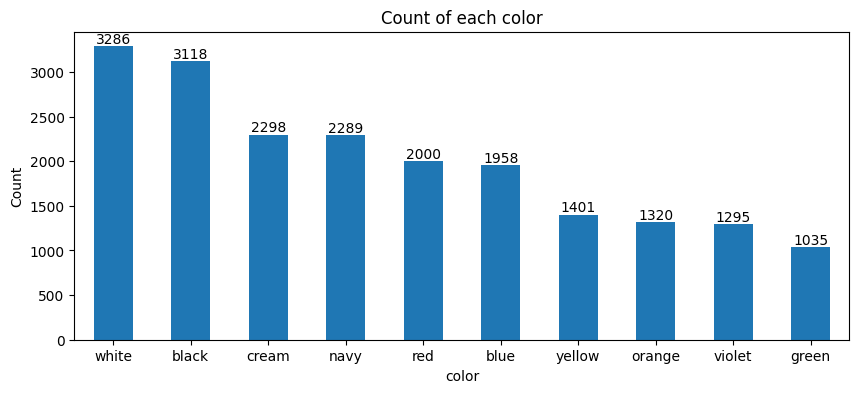

In [300]:
plot_features_count(df, 'color')

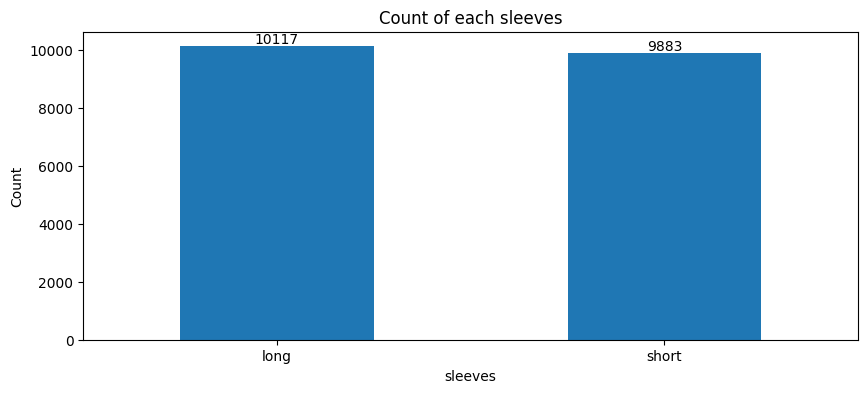

In [301]:
plot_features_count(df, 'sleeves')

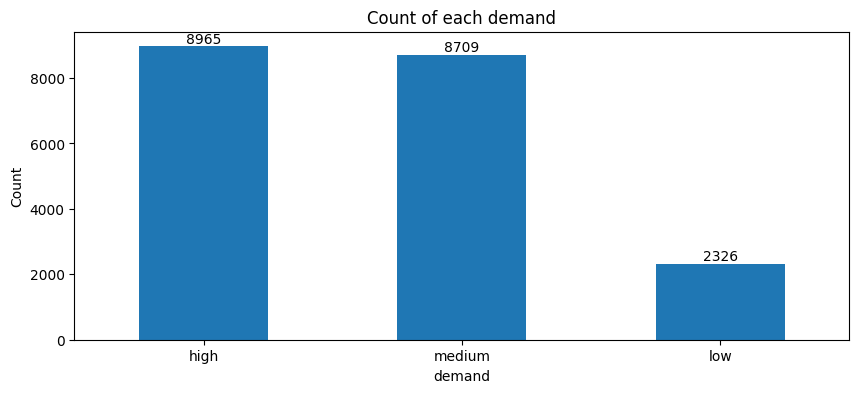

In [302]:
plot_features_count(df, 'demand')

Create a correlation matrix.

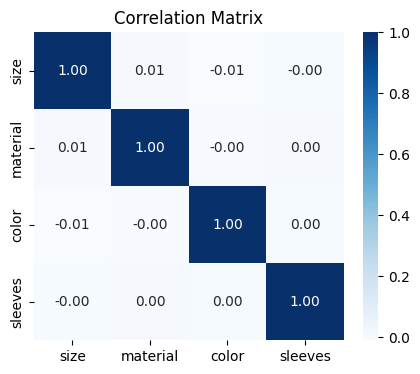

In [303]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

X_corr = df.copy().drop(['demand'], axis=1)
X_corr['material'] = LabelEncoder().fit_transform(X_corr['material'])
X_corr['color'] = LabelEncoder().fit_transform(X_corr['color'])
X_corr['sleeves'] = LabelEncoder().fit_transform(X_corr['sleeves'])
X_corr['size'] = LabelEncoder().fit_transform(X_corr['size'])
corr_matrix = X_corr.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

Converting categorical features to numerical features

In [304]:
df['sleeves'] = df['sleeves'].replace({'short': 0, 'long': 1})
df['size'] = df['size'].replace({'XS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5, '3XL': 6})
dummies = pd.get_dummies(df[['material', 'color']])
df = pd.concat([df, dummies], axis=1)
df.drop(['material', 'color'], axis=1, inplace=True)
df

C:\Users\pesta\AppData\Local\Temp\ipykernel_1156\1029539845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sleeves'] = df['sleeves'].replace({'short': 0, 'long': 1})
C:\Users\pesta\AppData\Local\Temp\ipykernel_1156\1029539845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['size'] = df['size'].replace({'XS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5, '3XL': 6})


,size,sleeves,demand,material_cotton,material_linen,material_nylon,material_polyester,material_silk,color_black,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow
0,1,1,medium,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,4,0,high,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2,1,0,medium,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
3,2,0,medium,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,4,1,medium,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,0,medium,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
19996,2,1,high,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
19997,5,0,high,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
19998,3,1,medium,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


Divide dataset into training and testing subsets.

In [305]:
X = df.drop(['demand'], axis=1)
y = df['demand']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Function to display the classification results

In [306]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
def classification_report_results(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
    print('Accuracy:', accuracy_score(y_test, y_pred))

Naive Bayes

              precision    recall  f1-score   support

        high       0.55      0.98      0.71      1803
         low       0.83      0.41      0.55       457
      medium       0.91      0.30      0.46      1740

    accuracy                           0.62      4000
   macro avg       0.76      0.56      0.57      4000
weighted avg       0.74      0.62      0.58      4000

Accuracy: 0.62


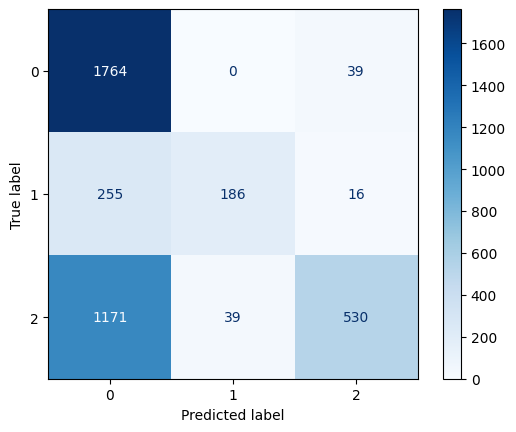

In [307]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)

classification_report_results(y_test, y_pred)

Decision tree

              precision    recall  f1-score   support

        high       0.98      0.99      0.99      1803
         low       0.95      0.92      0.93       457
      medium       0.97      0.97      0.97      1740

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000

Accuracy: 0.972


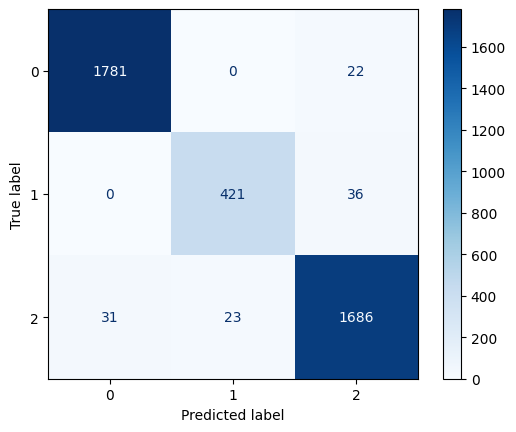

In [308]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)

classification_report_results(y_test, y_pred)

Additional preprocessing using normalization and PCA

In [309]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Naive Bayes with normalized data

              precision    recall  f1-score   support

        high       0.55      0.98      0.71      1803
         low       0.54      0.42      0.47       457
      medium       0.89      0.23      0.37      1740

    accuracy                           0.59      4000
   macro avg       0.66      0.54      0.52      4000
weighted avg       0.70      0.59      0.53      4000

Accuracy: 0.59


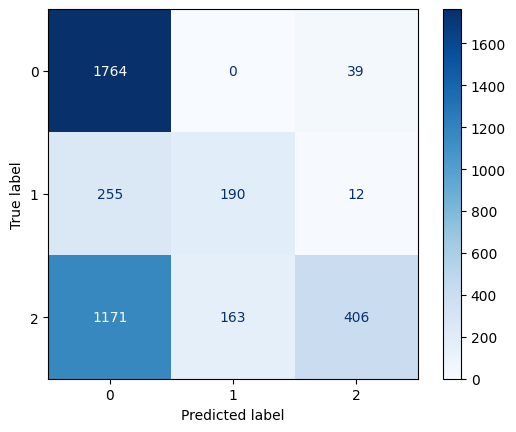

In [310]:
clf_nb.fit(X_train_normalized, y_train)
y_pred = clf_nb.predict(X_test_normalized)

classification_report_results(y_test, y_pred)

Decision Tree with normalized data

              precision    recall  f1-score   support

        high       0.98      0.99      0.99      1803
         low       0.95      0.92      0.93       457
      medium       0.97      0.97      0.97      1740

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000

Accuracy: 0.972


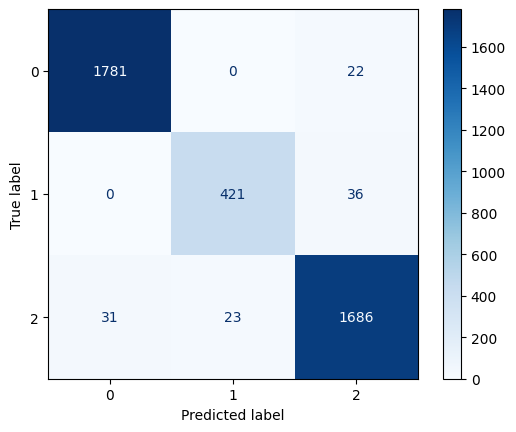

In [311]:
clf_dt.fit(X_train_normalized, y_train)
y_pred = clf_dt.predict(X_test_normalized)

classification_report_results(y_test, y_pred)

Naive Bayes with PCA

              precision    recall  f1-score   support

        high       0.68      0.79      0.73      1803
         low       0.48      0.55      0.51       457
      medium       0.68      0.54      0.60      1740

    accuracy                           0.65      4000
   macro avg       0.61      0.63      0.62      4000
weighted avg       0.66      0.65      0.65      4000

Accuracy: 0.6535


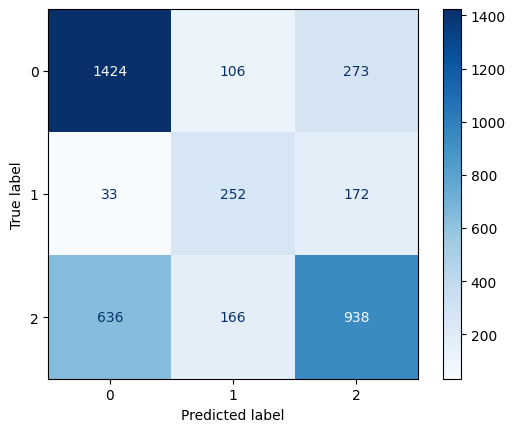

In [312]:
clf_nb.fit(X_train_pca, y_train)
y_pred = clf_nb.predict(X_test_pca)

classification_report_results(y_test, y_pred)

Decision Tree with PCA

              precision    recall  f1-score   support

        high       0.98      0.99      0.99      1803
         low       0.95      0.92      0.93       457
      medium       0.97      0.97      0.97      1740

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000

Accuracy: 0.972


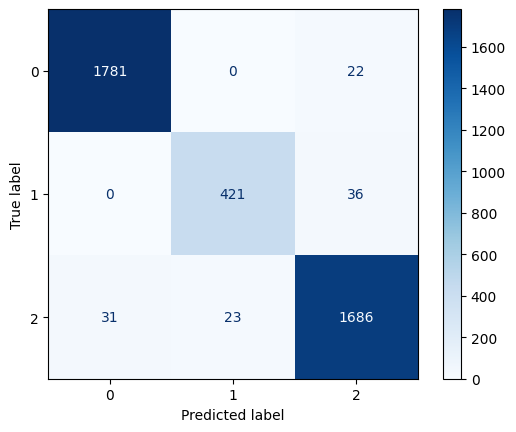

In [313]:
clf_dt.fit(X_train_pca, y_train)
y_pred = clf_dt.predict(X_test_pca)

classification_report_results(y_test, y_pred)

PCA gives the best results so it will be used from that point 

In [328]:
X_train, X_test = X_train_pca, X_test_pca

Naive Bayes hyperparameters

In [329]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

nbModel_grid = GridSearchCV(
                            estimator=GaussianNB(),
                            param_grid=param_grid_nb, 
                            verbose=1, 
                            cv=10, 
                            n_jobs=-1
                        )

nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0533669923120631)


Decision Tree hyperparameters

In [340]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

dtModel_grid = GridSearchCV(
                            estimator=DecisionTreeClassifier(),
                            param_grid=param_grid_dt, 
                            verbose=1, 
                            cv=2, 
                            n_jobs=-1
                        )

dtModel_grid.fit(X_train, y_train)
print(dtModel_grid.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
